In [ ]:
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification


Dataset URL: https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification
License(s): copyright-authors
 68% 3.00M/4.38M [00:00<00:00, 30.3MB/s]
100% 4.38M/4.38M [00:00<00:00, 33.3MB/s]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk

import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as layer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords

In [ ]:
import zipfile
import pandas as pd

# Définir le chemin du fichier téléchargé
zip_path = "covid-19-nlp-text-classification.zip"

# Extraire les fichiers
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("covid-19-nlp-dataset")

print("Dataset extrait dans le dossier 'covid-19-nlp-dataset'")


Dataset extrait dans le dossier 'covid-19-nlp-dataset'


In [ ]:
data = pd.read_csv("/content/covid-19-nlp-dataset/Corona_NLP_train.csv", encoding = 'latin')

In [ ]:
test= pd.read_csv("/content/covid-19-nlp-dataset/Corona_NLP_test.csv", encoding = 'latin')

In [ ]:
data.shape

(41157, 6)

In [ ]:
test.shape

(3798, 6)

In [ ]:
df = pd.concat([data, test], axis=0)  # axis=0 signifie concaténation par ligne
print(df.shape)

(44955, 6)


In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
distribustion_label = df.Sentiment.value_counts()
distribustion_label

,count
Sentiment,
Positive,12369
Negative,10958
Neutral,8332
Extremely Positive,7223
Extremely Negative,6073


Text(0.5, 1.0, "la distribution de label dans le jeu de donnees d'entrainement")

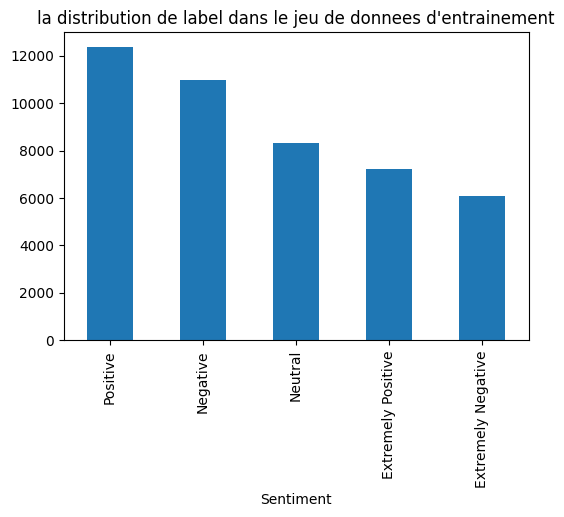

In [ ]:
plt.figure(figsize = (6,4))
distribustion_label.plot(kind='bar')
plt.title("la distribution de label dans le jeu de donnees d'entrainement")


# Clean text

In [ ]:
import re
def text_cleaner(tweet):
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    return tweet

stop_words = stopwords.words('english')



In [ ]:
X = df.OriginalTweet

In [ ]:
Y = df.Sentiment

In [ ]:
X_c = X.apply(text_cleaner)
X_c.head()

,OriginalTweet
0,
1,advice Talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths give elderly...
3,"My food stock one empty... PLEASE, panic, THER..."
4,"Me, ready go supermarket outbreak. Not I'm par..."


In [ ]:
import numpy as np
Y = np.array(Y)

# split data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_c, Y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35964,)
(8991,)
(35964,)
(8991,)


# Tokenisation

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_c)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)+1
VOCAB_SIZE

37773

In [ ]:
maxlen = 128

In [ ]:
data_sequences_train = tokenizer.texts_to_sequences(X_train)
data_padded_sequences_train = pad_sequences(data_sequences_train ,maxlen=maxlen,padding='post',truncating='post')

In [ ]:
data_sequences_test = tokenizer.texts_to_sequences(X_test)
data_padded_sequences_test = pad_sequences(data_sequences_test,maxlen=maxlen,padding='post',truncating='post')

In [ ]:
len(data_sequences_train)

35964

In [ ]:
len(data_sequences_test)

8991

In [ ]:
len(data_sequences_train)

35964

# Entrainement de model

In [ ]:
embedding_dim = 200

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Définir le modèle CNN
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=embedding_dim, input_length=maxlen),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes de sentiment
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    data_padded_sequences_train, y_train_encoded,
    validation_data=(data_padded_sequences_test, y_test_encoded),
    epochs=10,  # Vous pouvez augmenter ou réduire ce nombre
    batch_size=32,
    verbose=1
)

Epoch 1/10
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 204s 179ms/step - accuracy: 0.4281 - loss: 1.2976 - val_accuracy: 0.7152 - val_loss: 0.7717
Epoch 2/10
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 203s 180ms/step - accuracy: 0.7456 - loss: 0.7004 - val_accuracy: 0.7413 - val_loss: 0.6843
Epoch 3/10
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 261s 180ms/step - accuracy: 0.8358 - loss: 0.4774 - val_accuracy: 0.7372 - val_loss: 0.7637
Epoch 4/10
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 198s 177ms/step - accuracy: 0.8876 - loss: 0.3279 - val_accuracy: 0.7397 - val_loss: 0.8638
Epoch 5/10
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 203s 178ms/step - accuracy: 0.9215 - loss: 0.2229 - val_accuracy: 0.7337 - val_loss: 1.1236
Epoch 6/10
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 200s 176ms/step - accuracy: 0.9437 - loss: 0.1638 - val_accuracy: 0.7206 - val_loss: 1.3516
Epoch 7/10
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 199s 174ms/step - accuracy: 0.9556 - loss: 0.1300 - val_accuracy: 0.7193 - val_loss: 1.4781
Epoch 8/10
1124/1124 ━━━━━━━━━━━━━━━━━━━━ 204s 181ms/step - ac

# evaluation de model

In [ ]:
# Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(data_padded_sequences_test, y_test_encoded, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 2.0370
Test Accuracy: 0.7109


In [ ]:
# Prédictions sur les données de test
predictions = model.predict(data_padded_sequences_test)

# Convertir les probabilités en classes
predicted_classes = predictions.argmax(axis=-1)

# Comparer avec les vraies classes
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, predicted_classes))


281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      1180
           1       0.73      0.72      0.72      1461
           2       0.67      0.63      0.65      2217
           3       0.81      0.83      0.82      1637
           4       0.65      0.74      0.70      2496

    accuracy                           0.71      8991
   macro avg       0.73      0.71      0.71      8991
weighted avg       0.71      0.71      0.71      8991



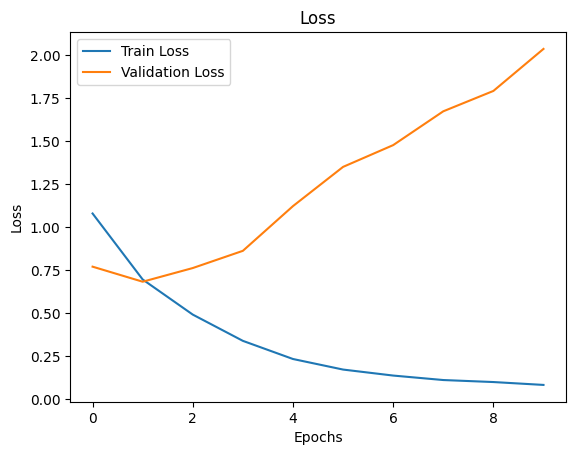

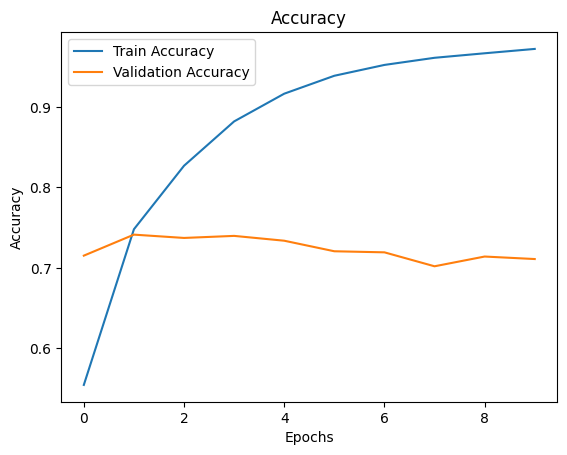

In [ ]:
import matplotlib.pyplot as plt

# Tracer la perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Tracer la précision
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


# Validation croisée avec recherche d'hyperparamètres

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Définir les paramètres de validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Stocker les résultats
fold_accuracies = []
fold_histories = []

# Boucle sur chaque fold
for train_index, val_index in kf.split(data_padded_sequences_train):
    X_fold_train, X_fold_val = data_padded_sequences_train[train_index], data_padded_sequences_train[val_index]
    y_fold_train, y_fold_val = y_train_encoded[train_index], y_train_encoded[val_index]

    # Définir un modèle avec régularisation
    model = Sequential([
        Embedding(input_dim=VOCAB_SIZE, output_dim=embedding_dim, input_length=maxlen),
        Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer='l2'),  # L2 régularisation
        GlobalMaxPooling1D(),
        Dense(64, activation='relu', kernel_regularizer='l2'),
        Dropout(0.5),  # Dropout pour régularisation
        Dense(5, activation='softmax')  # 5 classes
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle sur ce fold
    history = model.fit(
        X_fold_train, y_fold_train,
        validation_data=(X_fold_val, y_fold_val),
        epochs=10,
        batch_size=32,
        verbose=1
    )

    # Sauvegarder les résultats
    fold_accuracies.append(model.evaluate(X_fold_val, y_fold_val, verbose=0)[1])  # Stocker l'accuracy
    fold_histories.append(history)

# Résumé de la validation croisée
print(f"Validation Accuracy (moyenne): {np.mean(fold_accuracies):.4f}")
print(f"Validation Accuracy (écart-type): {np.std(fold_accuracies):.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 166s 180ms/step - accuracy: 0.3055 - loss: 1.8892 - val_accuracy: 0.6050 - val_loss: 1.1189
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 197s 175ms/step - accuracy: 0.6141 - loss: 1.0884 - val_accuracy: 0.6861 - val_loss: 0.9684
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 174s 193ms/step - accuracy: 0.6970 - loss: 0.9214 - val_accuracy: 0.6864 - val_loss: 0.9464
Epoch 4/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 160s 177ms/step - accuracy: 0.7315 - loss: 0.8365 - val_accuracy: 0.7021 - val_loss: 0.9145
Epoch 5/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 187s 161ms/step - accuracy: 0.7594 - loss: 0.7752 - val_accuracy: 0.7022 - val_loss: 0.9088
Epoch 6/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 220s 180ms/step - accuracy: 0.7882 - loss: 0.7291 - val_accuracy: 0.7086 - val_loss: 0.9220
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 200s 178ms/step - accuracy: 0.8154 - loss: 0.6572 - val_accuracy: 0.6904 - val_loss: 0.9838
Epoch 8/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 199s 174ms/step - accuracy: 0.8411 -

# Evaluation du modele

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Prédictions sur les données de test
y_pred_prob = model.predict(data_padded_sequences_test)
y_pred = y_pred_prob.argmax(axis=-1)

# Rapport de classification
print("Classification Report:\n")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

# Calculer l'AUC si applicable
if len(label_encoder.classes_) == 2:  # Applicable uniquement pour 2 classes
    auc_score = roc_auc_score(y_test_encoded, y_pred_prob[:, 1])
    print(f"AUC: {auc_score:.4f}")


281/281 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step
Classification Report:

                    precision    recall  f1-score   support

Extremely Negative       0.82      0.43      0.56      1180
Extremely Positive       0.67      0.74      0.71      1461
          Negative       0.60      0.68      0.64      2217
           Neutral       0.81      0.79      0.80      1637
          Positive       0.63      0.67      0.65      2496

          accuracy                           0.68      8991
         macro avg       0.71      0.66      0.67      8991
      weighted avg       0.69      0.68      0.67      8991

Confusion Matrix:

[[ 504   10  595    7   64]
 [   2 1087   35    1  336]
 [  94   36 1515  196  376]
 [   1   20  121 1295  200]
 [  10  467  243   95 1681]]


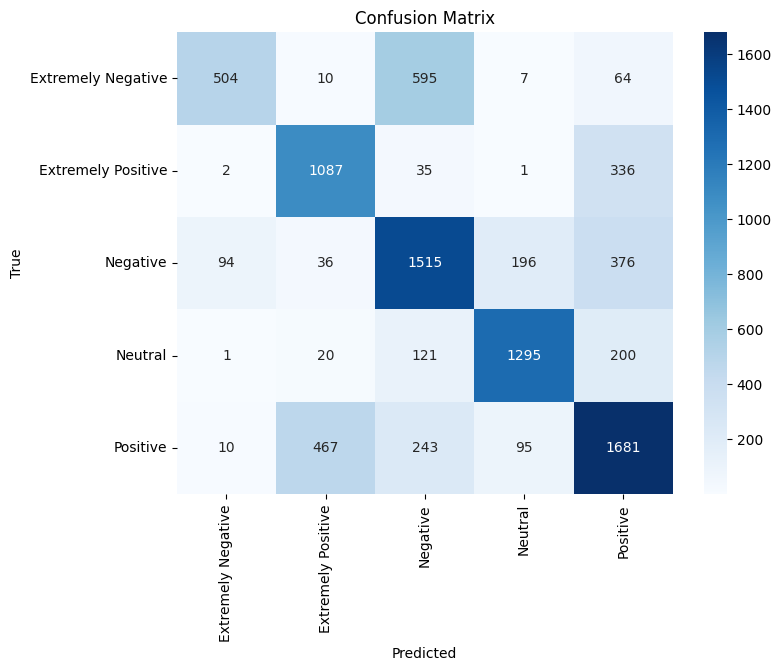

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


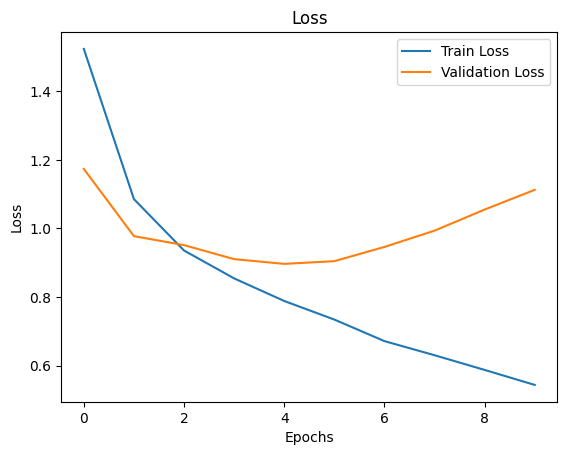

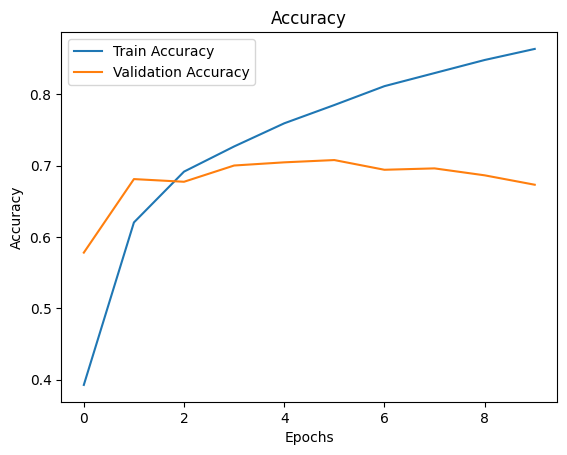

In [ ]:
import matplotlib.pyplot as plt

# Tracer la perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Tracer la précision
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
